In [1]:
# Import the required libraries: Pandas, Numpy, Matplotlib and   Seaborn

import pandas as pd          
import numpy as np 
import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")



In [2]:
# Let us load and read the data from the csv file 

df=pd.read_csv("train.csv")
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.sample(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
429,LP002370,Male,No,0,Not Graduate,No,2717,0.0,60.0,180.0,1.0,Urban,Y
272,LP001892,Male,No,0,Graduate,No,2833,1857.0,126.0,360.0,1.0,Rural,Y
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y


In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
# Compute the Correlation Matrix

corr = df.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


### Generating Correlation Heatmaps With Seaborn 

### Continuous Numerical Variables

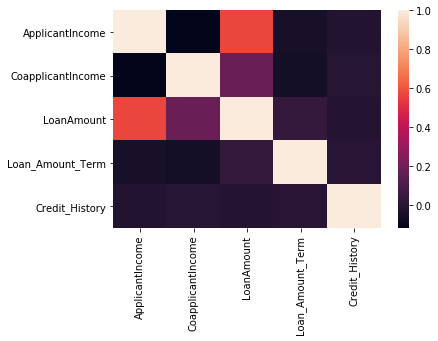

In [9]:
# Correlation Heatmap
    
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

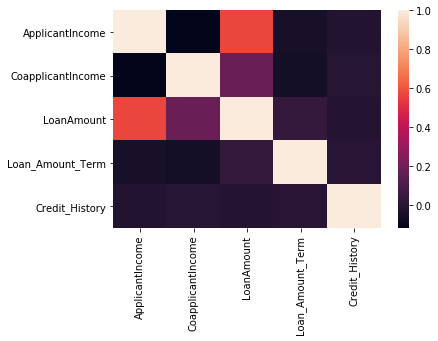

In [38]:
# plot the heatmap

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### Categorical Vairables Correlations

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [57]:
#  Create a set of dummy variables from the sex variable

df_sex = pd.get_dummies(df['Education'])

#  Join the dummy variables to the main dataframe

df_new = pd.concat([df, df_sex], axis=1)
df_new.sample(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Graduate,Not Graduate
400,LP002288,Male,Yes,2,Not Graduate,No,2889,0.0,45.0,180.0,0.0,Urban,N,0,1
551,LP002784,Male,Yes,1,Not Graduate,No,2492,2375.0,NaN,360.0,1.0,Rural,Y,0,1


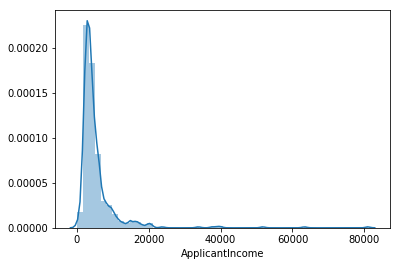

In [17]:
sns.distplot(df["ApplicantIncome"])

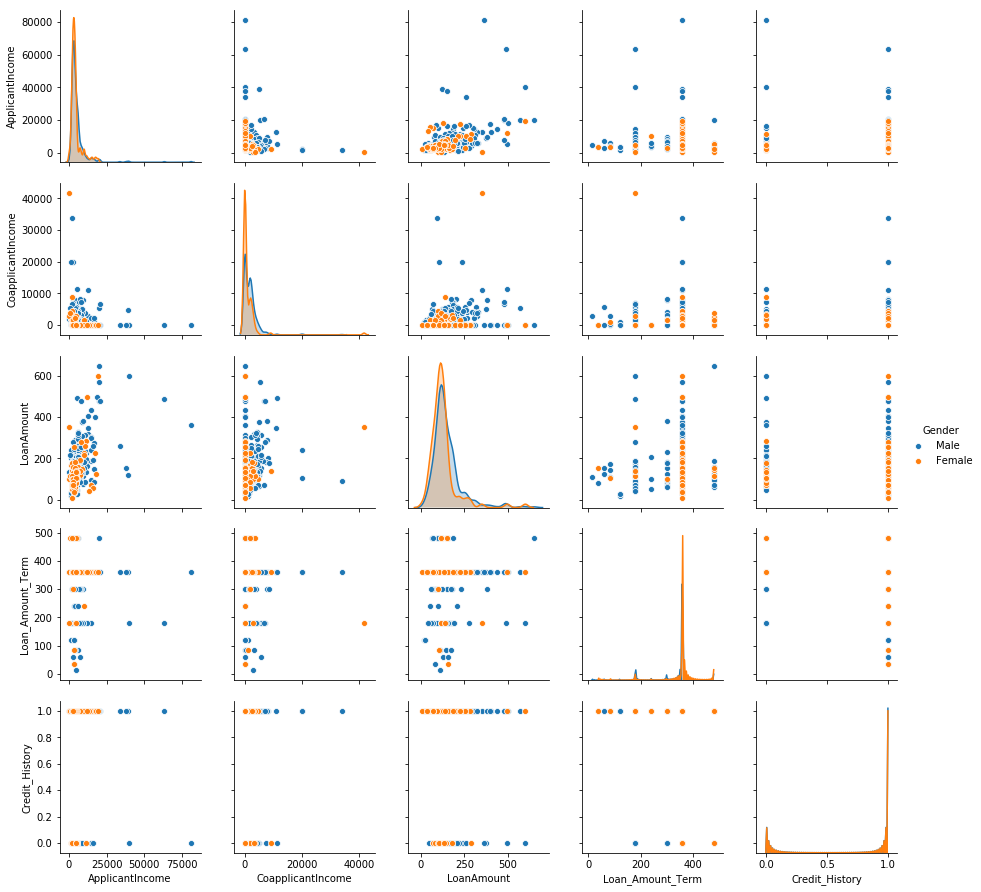

In [65]:
# Plot pairwise relationships in a dataset.

g = sns.pairplot(df, hue="Gender")
g

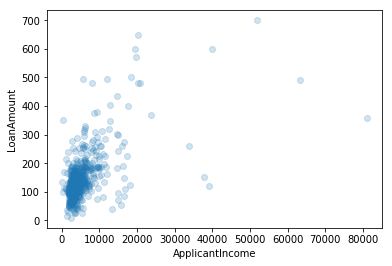

In [19]:
sns.regplot(x="ApplicantIncome", y="LoanAmount", data=df, fit_reg=False, scatter_kws={"alpha": 0.2})

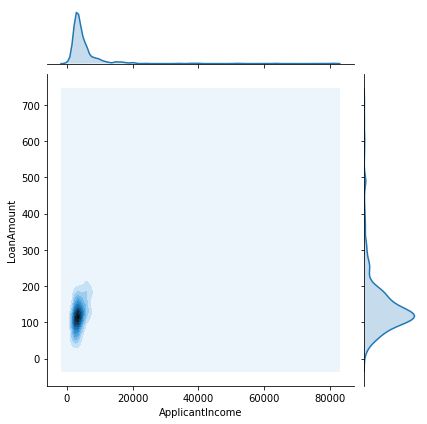

In [20]:
sns.jointplot(x="ApplicantIncome", y="LoanAmount", kind='kde', data=df)

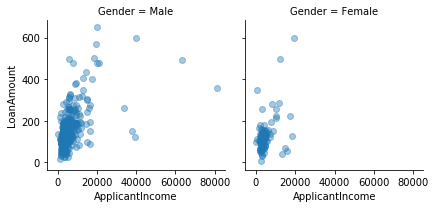

In [24]:
df["Gender"] = df["Gender"].replace({1: "Female", 2: "Male"}) 
sns.FacetGrid(df, col="Gender").map(plt.scatter, "ApplicantIncome", "LoanAmount", alpha=0.4).add_legend()

In [25]:
print(df.loc[df["Gender"]=="Female", ["ApplicantIncome", "LoanAmount"]].dropna().corr())
print(df.loc[df["Gender"]=="Male", ["ApplicantIncome", "LoanAmount"]].dropna().corr())

                 ApplicantIncome  LoanAmount
ApplicantIncome         1.000000    0.474038
LoanAmount              0.474038    1.000000
                 ApplicantIncome  LoanAmount
ApplicantIncome         1.000000    0.542211
LoanAmount              0.542211    1.000000


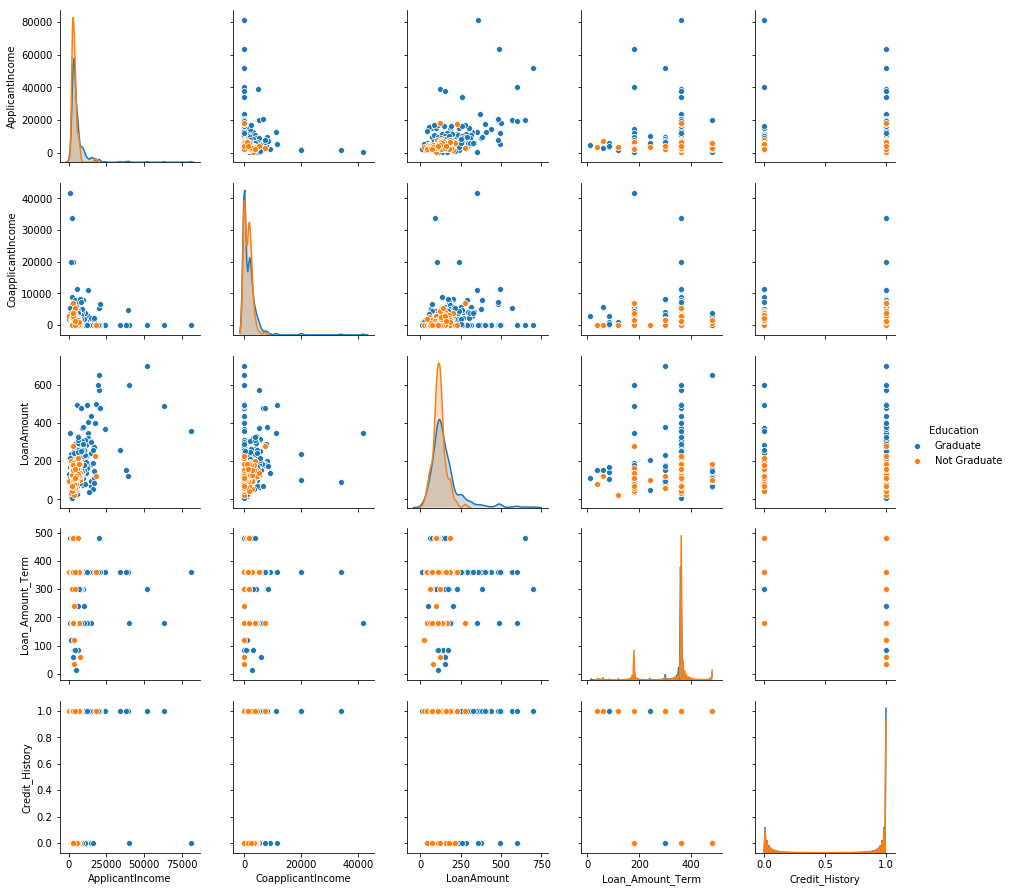

In [12]:
# Visualising the pairwise relationships in a dataset

sns.pairplot(df, hue='Education')
plt.show()

Bar charts and categorical data

Bar charts are arguably the simplest data visualization. They map categories to numbers: the amount of eggs consumed for breakfast (a category) to a number breakfast-eating Americans, for example; or, in our case, wine-producing provinces of the world (category) to the number of labels of wines they produce (number):



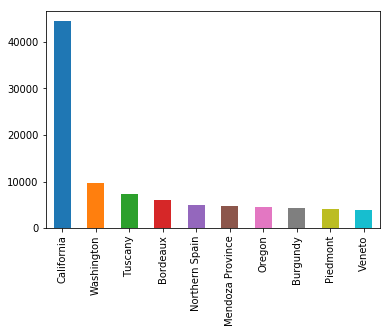

In [6]:
df['province'].value_counts().head(10).plot.bar()


What does this plot tell us? It says California produces far more wine than any other province of the world! We might ask what percent of the total is Californian vintage? This bar chart tells us absolute numbers, but it's more useful to know relative proportions. No problem:
This tells us that California produces far more wine than any other province of the world!


In [7]:
(df['province'].value_counts().head(10) / len(reviews)).plot.bar()

NameError: name 'reviews' is not defined

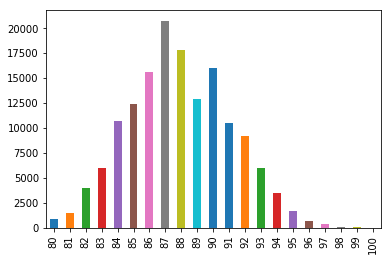

In [11]:
df['points'].value_counts().sort_index().plot.bar()


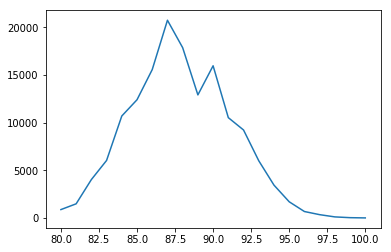

In [12]:
df['points'].value_counts().sort_index().plot.line()

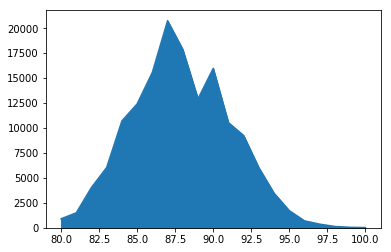

In [13]:
df['points'].value_counts().sort_index().plot.area()


In [14]:
df[reviews['price'] < 200]['price'].plot.hist()

NameError: name 'reviews' is not defined